In [2]:
import pandas as pd
import numpy as np
#Data acquisation
file_path="/content/titanic.csv"
df=pd.read_csv(file_path,header= 0,
                        encoding= 'unicode_escape', sep=';')


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
#DATA Observation :Insights 
print("the shape of the dataframe is " ,df.shape)
print("the size of the dataframe is " ,df.size)
print("the number of rows in the dataframe is " ,len(df))
print("the number of columns of the dataframe is " ,len(df.columns))

the shape of the dataframe is  (891, 12)
the size of the dataframe is  10692
the number of rows in the dataframe is  891
the number of columns of the dataframe is  12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:

df.shape

(891, 12)

In [8]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print(df['Cabin'].value_counts())

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F33            3
              ..
A36            1
D9             1
B101           1
D11            1
A20            1
Name: Cabin, Length: 147, dtype: int64


In [12]:
df['Cabin'].fillna('G6', inplace=True)

In [13]:
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [14]:
df['Embarked'].fillna('S', inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

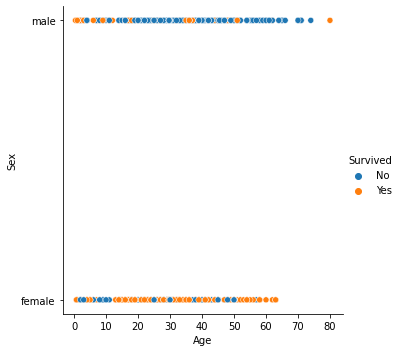

In [17]:
sns.relplot(x='Age', y='Sex', hue='Survived', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


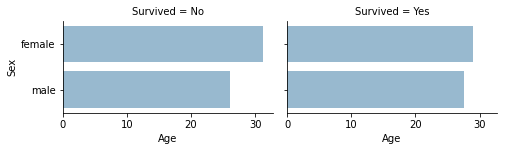

In [26]:
grid = sns.FacetGrid(df, col="Survived", height=2.2, aspect=1.6)
grid.map(sns.barplot,'Age',"Sex", alpha=.5, ci=None)
grid.add_legend()

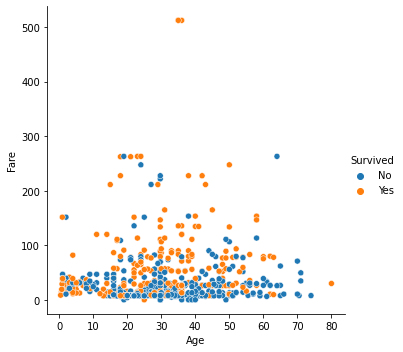

In [28]:
sns.relplot(x='Age', y='Fare', hue='Survived', data=df)

In [54]:
def plot_correlation_map( df ):
    corr = df.corr()



    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
  

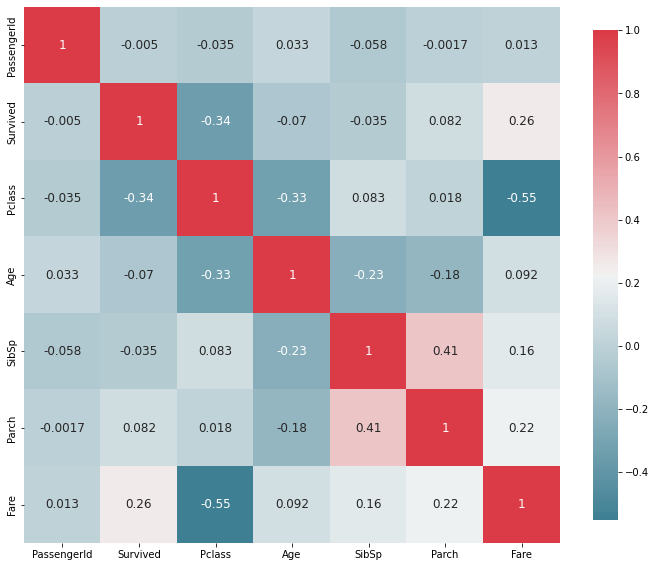

In [55]:
plot_correlation_map( df )

 **This function is a corroleation function that will display a heat map and shows the relationshsip between numerical variables**




In [39]:
cleanup={"Survived":{"Yes":1, "No": 0}}  
df.replace(cleanup, inplace=True)
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [44]:
# Dropping two columns 
df.drop('Ticket',axis='columns', inplace =True ) 
df.drop('Cabin',axis='columns', inplace =True ) 
# Adding new column 
Title =[]
for i in range (0,891) :
    ch=''
    x=df['Name'][i].index(',')
    y=df['Name'][i].index('.')
    for j in range (x+2,y) :
        ch=ch+df['Name'][i][j]
    Title.append(ch)
df['Title']=Title
df.drop('Name',axis='columns', inplace =True) 
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,343,0,2,male,28.000000,0,0,13.0000,S,Mr
1,76,0,3,male,25.000000,0,0,7.6500,S,Mr
2,641,0,3,male,20.000000,0,0,7.8542,S,Mr
3,568,0,3,female,29.000000,0,4,21.0750,S,Mrs
4,672,0,1,male,31.000000,1,0,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,30.0708,C,Mrs
887,61,0,3,male,22.000000,0,0,7.2292,C,Mr
888,535,0,3,female,30.000000,0,0,8.6625,S,Miss
889,102,0,3,male,29.699118,0,0,7.8958,S,Mr


In [45]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

TitleFam=[]
for i in range (0,891) :
    ch=Title_Dictionary[df['Title'][i]]
    TitleFam.append(ch)
df['TitleFam']=TitleFam
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TitleFam
0,343,0,2,male,28.000000,0,0,13.0000,S,Mr,Mrs
1,76,0,3,male,25.000000,0,0,7.6500,S,Mr,Mrs
2,641,0,3,male,20.000000,0,0,7.8542,S,Mr,Mrs
3,568,0,3,female,29.000000,0,4,21.0750,S,Mrs,Mrs
4,672,0,1,male,31.000000,1,0,52.0000,S,Mr,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,30.0708,C,Mrs,Mrs
887,61,0,3,male,22.000000,0,0,7.2292,C,Mr,Mrs
888,535,0,3,female,30.000000,0,0,8.6625,S,Miss,Miss
889,102,0,3,male,29.699118,0,0,7.8958,S,Mr,Mrs


NameError: ignored

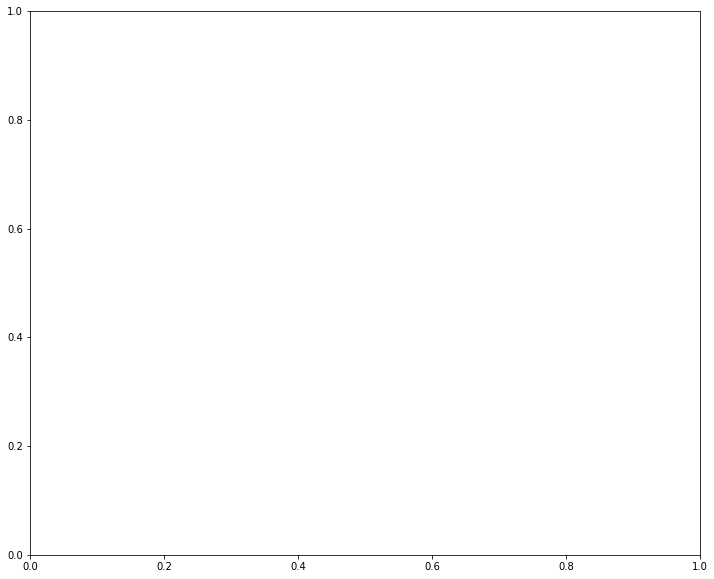

In [50]:
plot_correlation_map( df )